<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_8_Sentiment_Analysis_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 8: Sentiment Analysis
# MSSV - Họ tên


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Import libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from nltk.tokenize import word_tokenize
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from string import punctuation

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#Task 1. For a given dataset (named dataset1.csv) with emoticons removed. The dataset includes 2 attributes:


*   0 - sentiment (0 = negative, 1 = positive)
*   1 - text






#Task 1.1. Load the dataset and apply appropriate preprocessing techniques

In [6]:
#code
ds81 = pd.read_csv('dataset81.csv')

In [19]:
ds81_downsize = ds81.sample(n=200000, random_state=42)
ds81_downsize

,sentiment,text
58300,0,infobunni bunni can you put podcast back up i ...
852398,1,calden i m stay at bodega bay lodg not japan
73828,0,gon na be at school today ughh
632394,0,conorcaldwel i have anoth session left of them
819355,1,nycgrl i ve been watch all day keep tri to get...
...,...,...
369385,0,i took a nap and woke up with a headach
238230,0,wait for my babi to get home i miss him
749471,0,magnificentc ohhh that not gd x x
721897,0,caller again had ppl call in britneyticket


In [20]:
ds81_downsize.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 58300 to 785237
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  200000 non-null  int64 
 1   text       200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [21]:
ds81_downsize.isnull().sum()

,0
sentiment,0
text,0


In [22]:
ds81_downsize = ds81_downsize.dropna()

In [23]:
ds81_downsize.isnull().sum()

,0
sentiment,0
text,0


In [24]:
ds81_downsize['sentiment'].unique()

array([0, 1])

In [25]:
negative_text = ' '.join(ds81_downsize[ds81_downsize['sentiment'] == 0]['text'])
positive_text = ' '.join(ds81_downsize[ds81_downsize['sentiment'] == 1]['text'])
ds81_downsize = ds81_downsize[['sentiment','text']]
ds81_downsize.head()

,sentiment,text
58300,0,infobunni bunni can you put podcast back up i ...
852398,1,calden i m stay at bodega bay lodg not japan
73828,0,gon na be at school today ughh
632394,0,conorcaldwel i have anoth session left of them
819355,1,nycgrl i ve been watch all day keep tri to get...


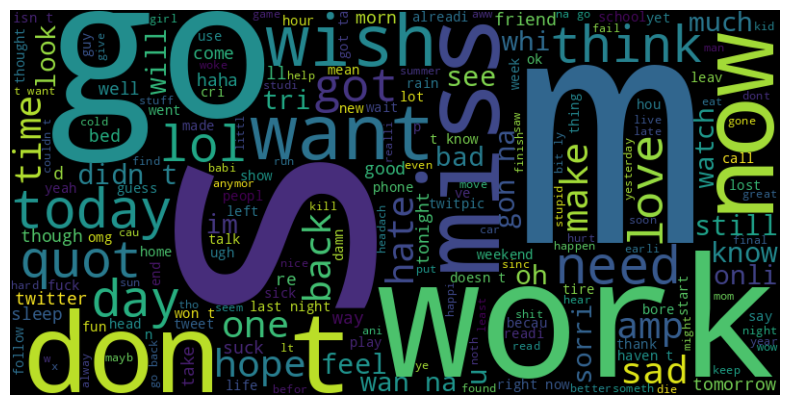

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
x = ds81_downsize['text']
y = ds81_downsize['sentiment']

vectorizer = tf()
vectors = vectorizer.fit_transform(x)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.3, random_state=42)

#Task 1.2. Apply classification algorithms (Decision Tree, kNN, Naive Bayes, RandomForest) to the dataset obtained from Task 1.1

In [30]:
#code
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
dt_y_proba = dt_clf.predict_proba(X_test)

kNN_clf = KNeighborsClassifier(n_neighbors=5)
kNN_clf.fit(X_train, y_train)
kNN_y_pred = kNN_clf.predict(X_test)
kNN_y_proba = kNN_clf.predict_proba(X_test)

gnb_clf = GaussianNB()
gnb_clf.fit(X_train.toarray(), y_train)
gnb_y_pred = gnb_clf.predict(X_test.toarray())
gnb_y_pred = gnb_clf.predict_proba(X_test.toarray())

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_y_proba = rf_clf.predict_proba(X_test)

KeyboardInterrupt: 

#Task 1.3. Apply PCA to get 100 componets from the training and test sets.


In [ ]:
#code
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Task 1.4. Apply classification algorithms (Decision Tree, kNN, Naive Bayes, RandomForest) to the dataset obtained from Task 1.3

In [ ]:
#code
dt_clf_pca = DecisionTreeClassifier(max_depth=3)
dt_clf_pca.fit(X_train_pca, y_train)
dt_y_pred_pca = dt_clf.predict(X_test_pca)
dt_y_proba_pca = dt_clf_pca.predict_proba(X_test_pca)

kNN_clf_pca = KNeighborsClassifier(n_neighbors=5)
kNN_clf_pca.fit(X_train_pca, y_train)
kNN_y_pred_pca = kNN_clf.predict(X_test_pca)
kNN_y_proba_pca = kNN_clf_pca.predict_proba(X_test_pca)

gnb_clf_pca = GaussianNB()
gnb_clf_pca.fit(X_train_pca.toarray(), y_train)
gnb_y_pred_pca = gnb_clf.predict(X_test_pca.toarray())
gnb_y_proba_pca = gnb_clf_pca.predict_proba(X_test_pca.toarray())

rf_clf_pca = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_clf_pca.fit(X_train_pca, y_train)
rf_y_pred_pca = rf_clf.predict(X_test_pca)
rf_y_proba_pca = rf_clf_pca.predict_proba(X_test_pca)

#Task 1.5. Plot ROC curve and report the AUC values for classification results on test set in Task 1.3

In [ ]:
#code
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_proba_pca[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

kNN_fpr, kNN_tpr, _ = roc_curve(y_test, kNN_y_proba_pca[:, 1])
kNN_roc_auc = auc(kNN_fpr, kNN_tpr)

gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_y_proba_pca[:, 1])
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_proba_pca[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
plt.plot(kNN_fpr, kNN_tpr, label=f'kNN (AUC = {kNN_roc_auc:.2f})')
plt.plot(gnb_fpr, gnb_tpr, label=f'Naive Bayes (AUC = {gnb_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for classification results")
plt.legend(loc="best")
plt.show()

#Task 1.6.  Compare the performance of models in Task 1.2 and Task 1.4 based on accuracy, precision, recall, f1 metrics using PrettyTable

In [ ]:
#code
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='macro')
dt_recall = recall_score(y_test, dt_y_pred, average='macro')
dt_f1 = f1_score(y_test, dt_y_pred, average='macro')

kNN_accuracy = accuracy_score(y_test, kNN_y_pred)
kNN_precision = precision_score(y_test, kNN_y_pred, average='macro')
kNN_recall = recall_score(y_test, kNN_y_pred, average='macro')
kNN_f1 = f1_score(y_test, kNN_y_pred, average='macro')

gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
gnb_precision = precision_score(y_test, gnb_y_pred, average='macro')
gnb_recall = recall_score(y_test, gnb_y_pred, average='macro')
gnb_f1 = f1_score(y_test, gnb_y_pred, average='macro')

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='macro')
rf_recall = recall_score(y_test, rf_y_pred, average='macro')
rf_f1 = f1_score(y_test, rf_y_pred, average='macro')

dt_accuracy_pca = accuracy_score(y_test, dt_y_pred_pca);
dt_precision_pca = precision_score(y_test, dt_y_pred_pca, average='macro')
dt_recall_pca = recall_score(y_test, dt_y_pred_pca, average='macro')
dt_f1_pca = f1_score(y_test, dt_y_pred_pca, average='macro')

kNN_accuracy_pca = accuracy_score(y_test, kNN_y_pred_pca)
kNN_precision_pca = precision_score(y_test, kNN_y_pred_pca, average='macro')
kNN_recall_pca = recall_score(y_test, kNN_y_pred_pca, average='macro')
kNN_f1_pca = f1_score(y_test, kNN_y_pred_pca, average='macro')

gnb_accuracy_pca = accuracy_score(y_test, gnb_y_pred_pca)
gnb_precision_pca = precision_score(y_test, gnb_y_pred_pca, average='macro')
gnb_recall_pca = recall_score(y_test, gnb_y_pred_pca, average='macro')
gnb_f1_pca = f1_score(y_test, gnb_y_pred_pca, average='macro')

rf_accuracy_pca = accuracy_score(y_test, rf_y_pred_pca)
rf_precision_pca = precision_score(y_test, rf_y_pred_pca, average='macro')
rf_recall_pca = recall_score(y_test, rf_y_pred_pca, average='macro')
rf_f1_pca = f1_score(y_test, rf_y_pred_pca, average='macro')

from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

myTable.add_row(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1])
myTable.add_row(["KNN", kNN_accuracy, kNN_precision, kNN_recall, kNN_f1])
myTable.add_row(["Naive Bayes", gnb_accuracy, gnb_precision, gnb_recall, gnb_f1])
myTable.add_row(["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1])
myTable.add_row(["Decision Tree PCA", dt_accuracy_pca, kNN_precision_pca, dt_recall_pca, dt_f1_pca])
myTable.add_row(["KNN PCA", kNN_accuracy_pca, kNN_precision_pca, gnb_recall_pca, gnb_f1_pca])
myTable.add_row(["Naive Bayes PCA", gnb_accuracy_pca, gnb_precision_pca, gnb_recall_pca, gnb_f1_pca])
myTable.add_row(["Random Forest PCA", rf_accuracy_pca, rf_precision_pca, rf_recall_pca, rf_f1_pca])

print(myTable)

#Task 2. For a given dataset 2 with three classes: Positive, Negative and Neutral. Notice that not relevant to the entity (i.e. Irrelevant) as Neutral.



#Task 2.1. Load the dataset and apply appropriate preprocessing techniques. Remember to remove irrelevant attributes and check missing values (remove if the missing values are small)

In [ ]:
#code
ds82 = pd.read_csv('dataset82.csv')


#Task 2.2. Apply classification algorithms (Decision Tree, kNN, Naive Bayes, RandomForest) to the dataset obtained from Task 2.1

In [ ]:
#code

#Task 2.3. Report the performance of the models trained in Task 2.2. on test set using accuracy, precision, recall, f measure metrics

In [ ]:
#code

#Task 2.4. Plot ROC curve and report the AUC values for classification results on test set in Task 2.3

In [ ]:
#code